This is the second visualization, It display the relationship between genres and gross <br>
For user-friendly, only display the top 10 genres between 2010 to 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

display top 10 genres between 2010 to 2020

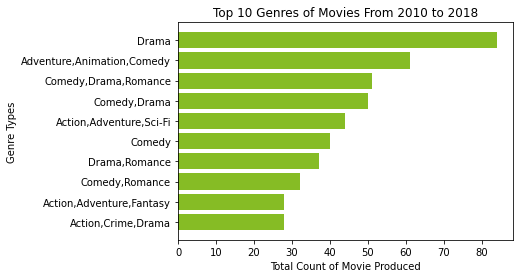

In [2]:
# open the file
df_gross = pd.read_csv('df_gross.zip')

# display bar plot of top 10 genres that occure the most between 2010 to 2020
plt.barh(list(df_gross['genres'].value_counts().index.tolist())[:10], df_gross['genres'].value_counts()[:10], color = '#86BC25')
plt.gca().invert_yaxis()

plt.title('Top 10 Genres of Movies From 2010 to 2018')
plt.xlabel('Total Count of Movie Produced')
plt.ylabel('Genre Types')

plt.show()


for user-friendly purpose, use units in million

In [3]:
df_gross['domestic_gross_y_in_m'] = df_gross['domestic_gross_y']/1000000

group the movies by genres, and only keep the domestic gross of genres in top 10

In [4]:
# group table by genres and sort it in descending order
series_tmp = df_gross.groupby('genres')['domestic_gross_y_in_m'].median().sort_values(ascending = False)

# take top 10 genres
tmp_list = list(df_gross['genres'].value_counts().index.tolist())[:10]
series_tmp = series_tmp.reset_index()

# only take the genres in top 10
series_tmp = series_tmp[series_tmp['genres'].isin(tmp_list)]
series_tmp

,genres,domestic_gross_y_in_m
7,"Action,Adventure,Sci-Fi",215.816297
19,"Adventure,Animation,Comedy",123.087120
41,"Action,Adventure,Fantasy",59.993997
46,Comedy,53.895268
76,"Comedy,Romance",39.977244
101,"Action,Crime,Drama",29.288556
138,"Comedy,Drama",18.419242
140,"Comedy,Drama,Romance",17.550872
157,"Drama,Romance",12.816367
159,Drama,12.734171


display domestic gross of top 10 genres

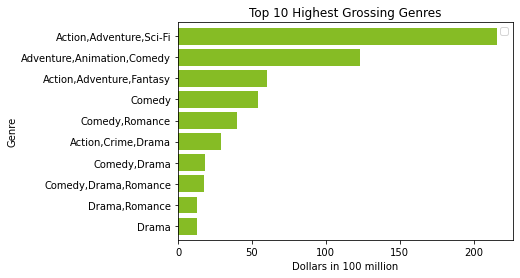

In [5]:
# create dataframe from series that only includes domestic gross of top 10 genres
df_graph = pd.DataFrame(series_tmp)

# draw bar plot
df_graph[:10].plot.barh(color = '#86BC25', width=0.8).set_yticklabels(df_graph['genres'])

plt.gca().invert_yaxis()

plt.title('Top 10 Highest Grossing Genres')
plt.xlabel('Dollars in 100 million')
plt.ylabel('Genre')
plt.legend('')

plt.show()


<br>
Visualize the number movies in recommending genres in each year <br> <br>
The recommending genres are 'Adventure,Animation,Comedy' and 'Action,Crime,Drama' because there are less number of movies produced with higher gross compare to other genres

In [6]:
# check whether numbers are valid
df_gross.loc[df_gross['genres'] == 'Adventure,Animation,Comedy', 'year'].value_counts()

2017    10
2016     9
2011     9
2013     7
2015     6
2012     6
2018     5
2014     5
2010     4
Name: year, dtype: int64

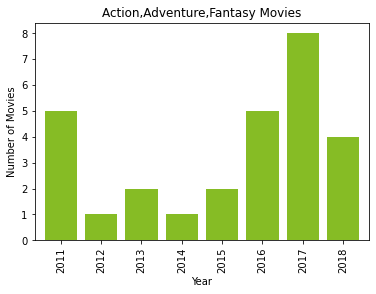

In [7]:
# plot the Action,Adventure,Fantasy first
series_tmp = df_gross.loc[df_gross['genres'] == 'Action,Adventure,Fantasy', 'year'].value_counts()
series_tmp.sort_index().plot.bar(color = '#86BC25', width=0.8)

plt.title('Action,Adventure,Fantasy Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

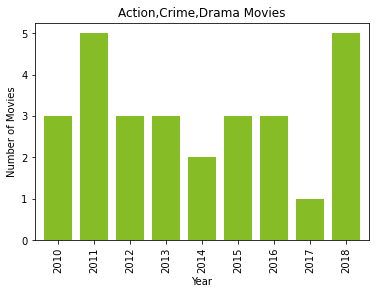

In [8]:
# plot Action,Crime,Drama
series_tmp = df_gross.loc[df_gross['genres'] == 'Action,Crime,Drama', 'year'].value_counts()
series_tmp.sort_index().plot.bar(color = '#86BC25', width=0.8)

plt.title('Action,Crime,Drama Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

show few example that has recommending genres

In [9]:
df_gross[df_gross['genres'] == 'Action,Adventure,Fantasy'].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,domestic_gross_y_in_m
14,tt0800369,Thor,Thor,2011,115.0,"Action,Adventure,Fantasy",tt0800369,7.0,683264,Thor,Par.,181000000.0,2011,70,"May 6, 2011",Thor,150000000,181030624,449326618,181.030624
36,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",tt2975590,6.5,576909,Batman v Superman: Dawn of Justice,WB,330400000.0,2016,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,330.360194
45,tt1981115,Thor: The Dark World,Thor: The Dark World,2013,112.0,"Action,Adventure,Fantasy",tt1981115,6.9,540996,Thor: The Dark World,BV,206400000.0,2013,66,"Nov 8, 2013",Thor: The Dark World,150000000,206362140,644602516,206.362140
55,tt1386697,Suicide Squad,Suicide Squad,2016,123.0,"Action,Adventure,Fantasy",tt1386697,6.0,533039,Suicide Squad,WB,325100000.0,2016,100,"Aug 5, 2016",Suicide Squad,175000000,325100054,746059887,325.100054
63,tt1211837,Doctor Strange,Doctor Strange,2016,115.0,"Action,Adventure,Fantasy",tt1211837,7.5,514510,Doctor Strange,BV,232600000.0,2016,28,"Nov 4, 2016",Doctor Strange,165000000,232641920,676404566,232.641920


In [10]:
df_gross[df_gross['genres'] == 'Action,Crime,Drama'].head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,domestic_gross_y_in_m
65,tt1276104,Looper,Looper,2012,113.0,"Action,Crime,Drama",tt1276104,7.4,500595,Looper,TriS,66500000.0,2012,69,"Sep 28, 2012",Looper,30000000,66486205,170466405,66.486205
124,tt3890160,Baby Driver,Baby Driver,2017,113.0,"Action,Crime,Drama",tt3890160,7.6,363977,Baby Driver,TriS,107800000.0,2017,59,"Jun 28, 2017",Baby Driver,34000000,107825862,228104185,107.825862
135,tt1637688,In Time,In Time,2011,109.0,"Action,Crime,Drama",tt1637688,6.7,346077,In Time,Fox,37500000.0,2011,74,"Oct 28, 2011",In Time,35000000,37553932,165103952,37.553932
146,tt3397884,Sicario,Sicario,2015,121.0,"Action,Crime,Drama",tt3397884,7.6,328548,Sicario,LGF,46900000.0,2015,100,"Sep 18, 2015",Sicario,30000000,46889293,84393749,46.889293
224,tt2140479,The Accountant,The Accountant,2016,128.0,"Action,Crime,Drama",tt2140479,7.3,233022,The Accountant,WB,86300000.0,2016,100,"Oct 14, 2016",The Accountant,40000000,86260045,152962083,86.260045


In [11]:
df_gross[df_gross['genres'] == 'Action,Crime,Drama'].sort_values(by = 'domestic_gross_y', ascending = False).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,domestic_gross_y_in_m
124,tt3890160,Baby Driver,Baby Driver,2017,113.0,"Action,Crime,Drama",tt3890160,7.6,363977,Baby Driver,TriS,107800000.0,2017,59,"Jun 28, 2017",Baby Driver,34000000,107825862,228104185,107.825862
224,tt2140479,The Accountant,The Accountant,2016,128.0,"Action,Crime,Drama",tt2140479,7.3,233022,The Accountant,WB,86300000.0,2016,100,"Oct 14, 2016",The Accountant,40000000,86260045,152962083,86.260045
504,tt1524137,Contraband,Contraband,2012,109.0,"Action,Crime,Drama",tt1524137,6.5,111709,Contraband,Uni.,66500000.0,2012,85,"Jan 13, 2012",Contraband,25000000,66528000,98406855,66.528000
65,tt1276104,Looper,Looper,2012,113.0,"Action,Crime,Drama",tt1276104,7.4,500595,Looper,TriS,66500000.0,2012,69,"Sep 28, 2012",Looper,30000000,66486205,170466405,66.486205
580,tt5052474,Sicario: Day of the Soldado,Sicario: Day of the Soldado,2018,122.0,"Action,Crime,Drama",tt5052474,7.1,95650,Sicario: Day of the Soldado,Sony,50100000.0,2018,59,"Jun 29, 2018",Sicario: Day of the Soldado,35000000,50065850,75885196,50.065850
